In [3]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

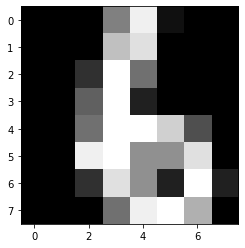

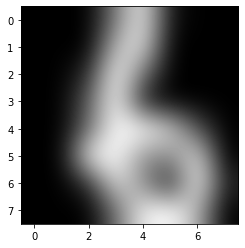

In [4]:
import numpy as np
import matplotlib.pyplot as plt

img=images[16]

assert 2 ==len(img.shape)

plt.figure()
plt.gray()
plt.imshow(img,interpolation="nearest")#alsotryinterpolation="bicubic"
plt.show()
plt.imshow(img,interpolation="bicubic")
plt.show()

In [5]:
indeces = [i for i, x in enumerate(target) if x == 3 or x == 9]
filtered_data = data[indeces]
filtered_images = images[indeces]
filtered_target = target[indeces]

217
64


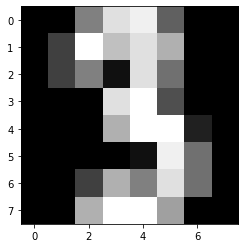

In [6]:
from sklearn import model_selection

X_train , X_test , y_train , y_test = model_selection.train_test_split(filtered_data, filtered_target, test_size = 0.4 , random_state = 0)

print(len(X_train))
print(len(X_train[0]))

plt.figure()
plt.gray()
plt.imshow(filtered_images[67],interpolation="nearest")#alsotryinterpolation="bicubic"
plt.show()

In [7]:
def features2d(x):
    features = []
    for i in range(len(x)):
        feature_of_3_i = x[i][20] + x[i][28] + 2*x[i][58]# some function of pixels
        feature_of_9_i = x[i][26] + x[i][18] + x[i][37]
        
        features.append([feature_of_3_i, feature_of_9_i])
    
    return features

106
111


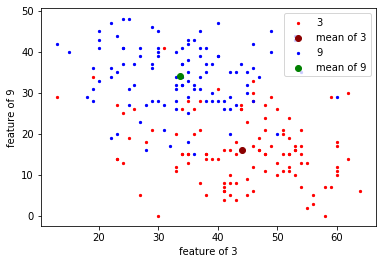

In [8]:
features = features2d(X_train)

features_of_3 = []
features_of_9 = []

for i in range(len(y_train)):
    if(y_train[i] == 3):
        features_of_3.append(features[i])
    if(y_train[i] == 9):
        features_of_9.append(features[i])

print(len(features_of_9))
print(len(features_of_3))

mean_of_3 = [np.mean(np.array(features_of_3)[:,0]), np.mean(np.array(features_of_3)[:,1])]
mean_of_9 = [np.mean(np.array(features_of_9)[:,0]), np.mean(np.array(features_of_9)[:,1])]

plt.scatter(np.array(features_of_3)[:,0], np.array(features_of_3)[:,1], color = "red", label = "3", s = 5)
plt.scatter(mean_of_3[0], mean_of_3[1], color = "darkred", label = "mean of 3")
plt.scatter(np.array(features_of_9)[:,0], np.array(features_of_9)[:,1], color = "blue", label = "9", s = 5)
plt.scatter(mean_of_9[0], mean_of_9[1], color = "green", label = "mean of 9")
plt.xlabel("feature of 3")
plt.ylabel("feature of 9")
plt.legend()
#print(np.array(features)[:,0])
plt.show()

In [29]:
def determine_feature_mean(features):
    features_of_3 = []
    features_of_9 = []

    for i in range(len(y_train)):
        if(y_train[i] == 3):
            features_of_3.append(features[i])
        if(y_train[i] == 9):
            features_of_9.append(features[i])

    mean_of_3 = [np.mean(np.array(features_of_3)[:,0]), np.mean(np.array(features_of_3)[:,1])]
    mean_of_9 = [np.mean(np.array(features_of_9)[:,0]), np.mean(np.array(features_of_9)[:,1])]
    
    return mean_of_3, mean_of_9

def nearest_mean(training_features, training_labels, test_features):
    mean_of_3, mean_of_9 = determine_feature_mean(training_features)
    
    predicted_labels = []
    for i in range(len(test_features)):
        dist_to_3 = (test_features[i][0] - mean_of_3[0])**2 + (test_features[i][1] - mean_of_3[1])**2
        dist_to_9 = (test_features[i][0] - mean_of_9[0])**2 + (test_features[i][1] - mean_of_9[1])**2
        
        if(dist_to_3 < dist_to_9):
            predicted_labels.append(-1)
        else:
            predicted_labels.append(1)

    return predicted_labels

def calculate_error(predicted_labels, real_labels):    
    number_errors = 0
    for i in range(len(predicted_labels)):     
        real_label_modified = -1 if real_labels[i] == 3 else 1
        
        if(not predicted_labels[i] == real_label_modified):
            number_errors += 1
         
        #print(number_errors)
    return number_errors / len(predicted_labels)

def create_decision_line(features):
    mean_of_3, mean_of_9 = determine_feature_mean(features)
    
    def line(x, a, b):
        return a * x + b
    
    def inverse_line(y, a, b):
        return (y - b) / a
    
    x_min = min(np.array(features)[:,0])
    x_max = max(np.array(features)[:,0])
    y_min = min(np.array(features)[:,1])
    y_max = max(np.array(features)[:,1])
 
    slope = (mean_of_3[1] - mean_of_9[1]) / (mean_of_3[0] - mean_of_9[0])
    slope = -slope**-1
    y_intersect = 0.5 * (mean_of_9[1] + mean_of_3[1]) - slope * 0.5 * (mean_of_9[0] + mean_of_3[0])
    x = np.linspace(max(inverse_line(y_min, slope, y_intersect), x_min), min(inverse_line(y_max, slope, y_intersect), x_max), 10)

    return x, line(x, slope, y_intersect)

In [54]:
def do_all():
    
    def features2d(x):
        features = []
        for i in range(len(x)):
            feature_of_3_i = x[i][20] + x[i][28] + 2*x[i][58]# some function of pixels
            feature_of_9_i = x[i][26] + x[i][18] + x[i][37]

            features.append([feature_of_3_i, feature_of_9_i])
        return features
    
    training_features = features2d(X_train)
    test_features = features2d(X_test)
    
    mean_of_3, mean_of_9 = determine_feature_mean(training_features)
    
    predicted_test_labels = nearest_mean(training_features, y_train, test_features)
    predicted_training_labels = nearest_mean(training_features, y_train, training_features)
    
    print("error of test set: " + str(calculate_error(predicted_test_labels, y_test)))
    print("error of training set: " + str(calculate_error(predicted_training_labels, y_train)))
       
    plt.figure(figsize = (17,5))
    plt.subplot(121)
    x, y = create_decision_line(training_features)
    plt.plot(x, y)
    plt.fill_between(x,y,50, color = "lightblue")
    plt.fill_between(x,y, color = "orange")
    plt.scatter(np.array(features_of_3)[:,0], np.array(features_of_3)[:,1], color = "red", label = "3", s = 5)
    plt.scatter(mean_of_3[0], mean_of_3[1], color = "darkred", label = "mean of 3")
    plt.scatter(np.array(features_of_9)[:,0], np.array(features_of_9)[:,1], color = "blue", label = "9", s = 5)
    plt.scatter(mean_of_9[0], mean_of_9[1], color = "darkblue", label = "mean of 9")
    plt.title("training features")
    plt.xlabel("feature of 3")
    plt.ylabel("feature of 9")
    plt.legend()
    
    test_features_of_3 = []
    test_features_of_9 = []
    
    for i in range(len(y_test)):
        if(y_test[i] == 3):
            test_features_of_3.append(test_features[i])
        if(y_test[i] == 9):
            test_features_of_9.append(test_features[i])
    
    plt.subplot(122)
    plt.plot(x, y)
    plt.fill_between(x,y,50, color = "lightblue")
    plt.fill_between(x,y, color = "orange")
    plt.scatter(mean_of_3[0], mean_of_3[1], color = "darkred", label = "mean of 3")
    plt.scatter(mean_of_9[0], mean_of_9[1], color = "darkblue", label = "mean of 9")
    plt.scatter(np.array(test_features_of_3)[:,0], np.array(test_features_of_3)[:,1], color = "red", label = "3", s = 5)
    plt.scatter(np.array(test_features_of_9)[:,0], np.array(test_features_of_9)[:,1], color = "blue", label = "9", s = 5)
    plt.title("test features")
    plt.xlabel("feature of 3")
    plt.ylabel("feature of 9")
    plt.legend()
    plt.show()

In [55]:
#preparation
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

indeces = [i for i, x in enumerate(target) if x == 3 or x == 9]
filtered_data = data[indeces]
filtered_images = images[indeces]
filtered_target = target[indeces]

X_train, X_test, y_train, y_test = model_selection.train_test_split(filtered_data, filtered_target, test_size = 0.4, random_state = 0)

error of test set: 0.1232876712328767
error of training set: 0.11981566820276497


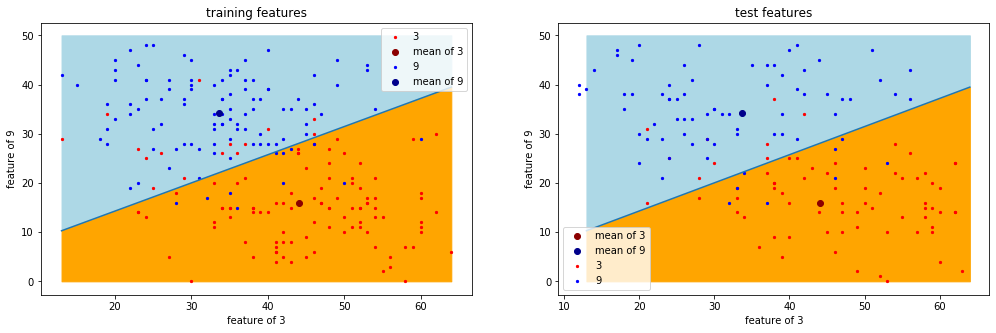

In [56]:
do_all()